### Import Libraries
Import essential libraries: TensorFlow for deep learning, NumPy for numerical operations, and Matplotlib for plotting.


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Import Libraries
Import essential libraries: TensorFlow for deep learning, NumPy for numerical operations, and Matplotlib for plotting.


In [2]:
# Generate synthetic data (non-linear regression problem)
np.random.seed(42)
X = np.random.rand(100, 1).astype(np.float32)  # 100 data points
y = (X**2 + np.random.randn(100, 1) * 0.1).astype(np.float32)  # Quadratic function with noise

### Define Neural Network Model
Build a 3-layer neural network using TensorFlow's Sequential API with two ReLU-activated hidden layers and one output layer.


In [3]:
# Define the model using TensorFlow's High-Level API (Sequential API)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5, activation='relu', input_shape=(1,)),  # First hidden layer
    tf.keras.layers.Dense(5, activation='relu'),  # Second hidden layer
    tf.keras.layers.Dense(1)  # Output layer (no activation for regression)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Display model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46 (184.00 B)

 Trainable params: 46 (184.00 B)

 Non-trainable params: 0 (0.00 B)

### Train the Model
Train the model for 1000 epochs using a custom callback that prints the training loss every 100 epochs.


In [6]:
class LossHistory(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if epoch % 100 == 0:  # Print loss every 100 epochs
            print(f"Epoch {epoch}: Loss = {logs.get('loss')}")

history = model.fit(X, y, epochs=1000, verbose=0, callbacks=[LossHistory()])

Epoch 0: Loss = 0.47022998332977295
Epoch 100: Loss = 0.02095487341284752
Epoch 200: Loss = 0.009922824800014496
Epoch 300: Loss = 0.00827310886234045
Epoch 400: Loss = 0.007989536039531231
Epoch 500: Loss = 0.007779615931212902
Epoch 600: Loss = 0.007762715220451355
Epoch 700: Loss = 0.007906420156359673
Epoch 800: Loss = 0.007853533141314983
Epoch 900: Loss = 0.007724374998360872


### Plot Training Loss
Visualize the model's training loss over all epochs to assess convergence and learning progress.


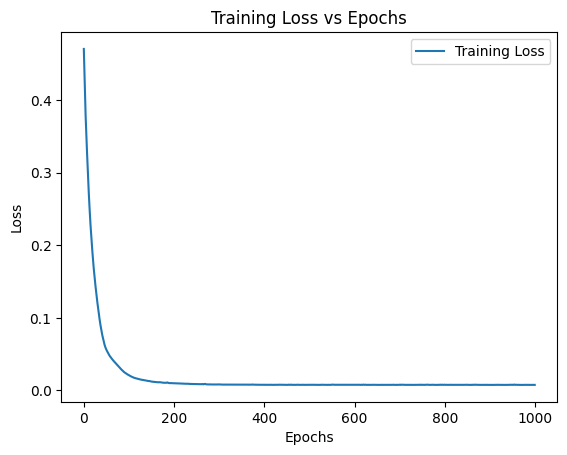

In [8]:
plt.plot(history.history['loss'], label="Training Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Epochs')
plt.legend()
plt.show()

### Predict and Visualize Results
Use the trained model to make predictions and plot them against the actual values to evaluate fit quality.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


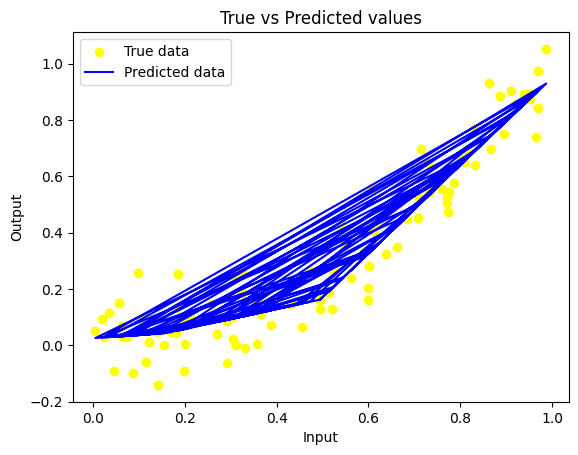

In [9]:
# Make predictions
y_pred = model.predict(X)

# Plot true vs predicted values
plt.scatter(X, y, color='yellow', label='True data')
plt.plot(X, y_pred, color='blue', label='Predicted data')
plt.title('True vs Predicted values')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

### 4D Visualization of Predictions
Plot a 3D graph showing input, actual, and predicted values. Use color to represent prediction error magnitude for deeper insight.


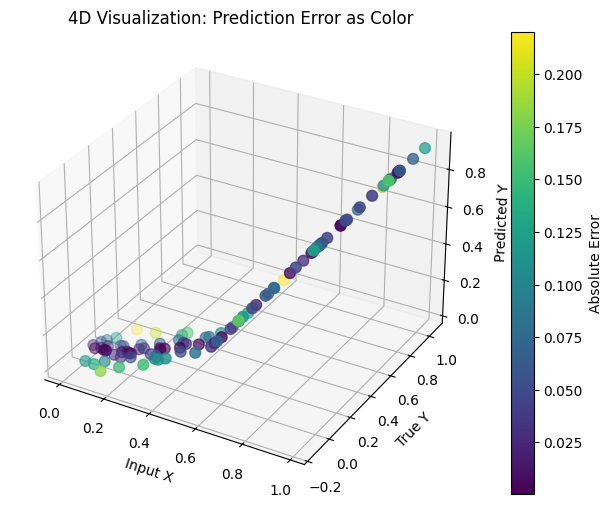

In [10]:
# 4D Visualization: input (X), true output (y), predicted output (y_pred), color = error
from mpl_toolkits.mplot3d import Axes3D

# Compute absolute error
errors = np.abs(y_pred - y).flatten()

# Create 4D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X.flatten(), y.flatten(), y_pred.flatten(), c=errors, cmap='viridis', s=60)
ax.set_xlabel("Input X")
ax.set_ylabel("True Y")
ax.set_zlabel("Predicted Y")
ax.set_title("4D Visualization: Prediction Error as Color")

cbar = fig.colorbar(sc)
cbar.set_label("Absolute Error")
plt.show()
